## `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

## `Objective:`
- To implement the techniques learnt as a part of the course.

## `Datasets Information:`

*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating

*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)


*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use

**`Please provide your insights wherever necessary.`**

## `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


## `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

# Import the necessary packages - 2.5 marks

In [3]:
#your code here
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Read the 3 datasets into dataframes - 2.5 marks

## Rating Dataframe

In [4]:
#your code here
rating = pd.read_csv('data.csv')
rating.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


## Movie Genre Dataframe

In [5]:
genre = pd.read_csv('item.csv')
genre.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


## User information Dataframe

In [6]:
user = pd.read_csv('user.csv')
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


# Apply info, shape, describe, and find the number of missing values in the data. Present at least 3 observations from these operations - 2.5 marks
 - Note that you will need to do it for all the three datasets seperately

## Movie Rating Dataframe Descriptors

In [7]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [8]:
rating.shape

(100000, 4)

In [9]:
rating.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,100000.0,4.624848e+02,2.666144e+02,1.0,254.0,447.0,682.0,943.0
movie id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.529860e+00,1.125674e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,8.835289e+08,5.343856e+06,874724710.0,879448709.5,882826944.0,888259984.0,893286638.0


In [10]:
rating.isna().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

## Movie Genre Dataframe Descriptors

In [11]:
genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [12]:
genre.shape

(1681, 22)

In [13]:
genre.describe().T

,count,mean,std,min,25%,50%,75%,max
movie id,1681.0,841.841761,485.638077,1.0,422.0,842.0,1262.0,1682.0
unknown,1681.0,0.000595,0.024390,0.0,0.0,0.0,0.0,1.0
Action,1681.0,0.149316,0.356506,0.0,0.0,0.0,0.0,1.0
Adventure,1681.0,0.080309,0.271852,0.0,0.0,0.0,0.0,1.0
Animation,1681.0,0.024985,0.156126,0.0,0.0,0.0,0.0,1.0
Childrens,1681.0,0.072576,0.259516,0.0,0.0,0.0,0.0,1.0
Comedy,1681.0,0.300416,0.458576,0.0,0.0,0.0,1.0,1.0
Crime,1681.0,0.064842,0.246321,0.0,0.0,0.0,0.0,1.0
Documentary,1681.0,0.029744,0.169931,0.0,0.0,0.0,0.0,1.0
Drama,1681.0,0.431291,0.495404,0.0,0.0,0.0,1.0,1.0


In [14]:
genre.isna().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [15]:
genre.skew()

movie id       -0.001127
unknown        41.000000
Action          1.969685
Adventure       3.091314
Animation       6.092262
Childrens       3.297931
Comedy          0.871487
Crime           3.537469
Documentary     5.541249
Drama           0.277717
Fantasy         8.576339
Film-Noir       8.196097
Horror          3.918806
Musical         5.205831
Mystery         4.963768
Romance         1.996252
Sci-Fi          3.705670
Thriller        1.969685
War             4.556006
Western         7.705942
dtype: float64

## Movie User Dataframe Descriptors


In [16]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [17]:
user.shape

(943, 5)

In [18]:
user.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,943.0,472.000000,272.364951,1.0,236.5,472.0,707.5,943.0
age,943.0,34.051962,12.192740,7.0,25.0,31.0,43.0,73.0


In [19]:
user.isna().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

**Observations:**
Dataframes provided contain data related to Ratings, with a rating, user_id and movie_id, the dataframe is considerable in size with a length of 100,000;  Genres, showing multiple genres per movie per year, with a movie_id feature to tie it to Ratings dataframe, its size is much smaller than Ratings' with a length of 1,680 ;  and Users, the smaller of the three dataframes with a length of 943, containing user-related information like age, sex, occupation and zip code, it ties to Ratings dataframe with user_id feature.  No null-values and slightly asymmetrical in non-categorical features in the dataframes.  It would've been interesting to see the zip code of the theatres to explore their networks by analyzing them to viewers' zips.  


# Find the number of movies per genre using the item data - 2.5 marks

In [20]:
GCount = genre.drop(['movie id', 'movie title','release date'], axis=1)
GCount.sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

**Method:**
Movies represented by rows, so a sum of the columns gives total movies per genre.


# Drop the movie where the genre is unknown - 2.5 marks

In [21]:
GCount = GCount.drop(['unknown'], axis=1).sum()
GCount

Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

**Insights:**
Drama, Comedy, and Action (the latter alongside Thriller and Romance), the top genres. 

# Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [25]:
GCount = genre.drop(['unknown'], axis=1)
GCount['GENRES'] = GCount.iloc[:, 3:].sum(axis=1)


MultiGenre = GCount[['movie title','GENRES']].copy()
MG = MultiGenre.loc[MultiGenre['GENRES'] >1]

print('there are {} movies with more than one genre\n'.format(len(MG)))

MG = MG.sort_values(by=['GENRES'], ascending=False)
MG

there are 849 movies with more than one genre



,movie title,GENRES
171,"Empire Strikes Back, The",6
558,"Kid in King Arthur's Court, A",6
424,"Transformers: The Movie, The",6
753,Jumanji,5
16,From Dusk Till Dawn,5
...,...,...
703,Singin' in the Rain,2
707,Strictly Ballroom,2
710,Tin Men,2
712,Carrington,2


**Insights:**



# Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age and countplot for release year, ratings, *

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

### Rating Univariate Analysis

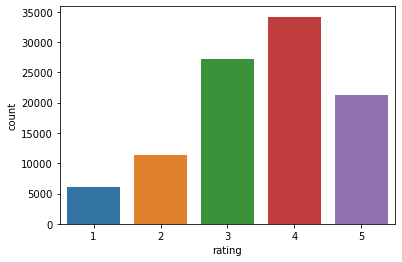

In [26]:
sns.countplot(rating['rating'])

### Age Univariate Analysis

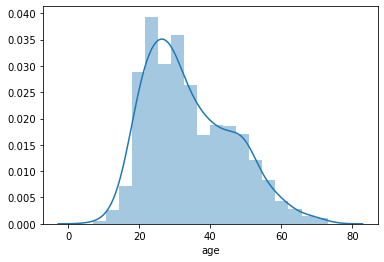

In [27]:
sns.distplot(user['age'])

### Release Year Univariate Analysis

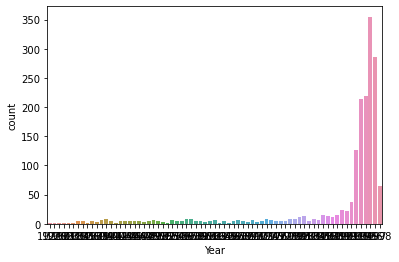

In [28]:
ReleaseYear = genre[['release date']].copy()
ReleaseYear['Year'] = pd.DatetimeIndex(ReleaseYear['release date']).year
sns.countplot(ReleaseYear['Year'])

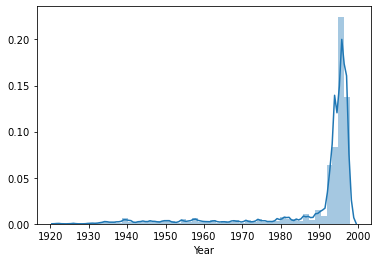

In [29]:
sns.distplot(ReleaseYear['Year']) #supplemented with distplot for better viewing

### Gender Univariate Analysis

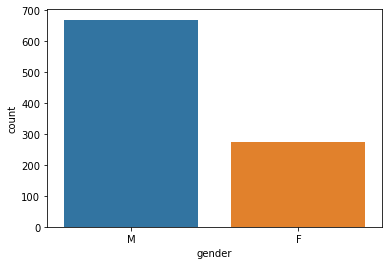

In [30]:
sns.countplot(user['gender'])

### Occupation Univariate Analysis

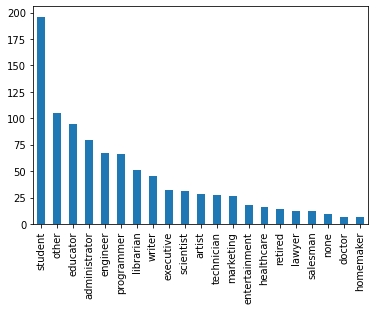

In [31]:
user['occupation'].value_counts().plot(kind='bar')

# Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use item dataset to get count of movies released in a particular year, store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.

**Method:**
Data suggests recent releases with multiple genres, so genre percent will be a function to total genres per year.

In [40]:
Genre = genre.copy()
Genre['Year'] = pd.DatetimeIndex(Genre['release date']).year
GenreByYear = Genre.groupby('Year').sum().drop(['movie id','unknown'], axis=1).reset_index()   
GenreByYear['TotalGenres'] = GenreByYear.iloc[:, 1:].sum(axis=1)
GenrePercent = GenreByYear.drop(['Year'], axis=1)
GenrePercent = (GenreByYear.div(GenreByYear['TotalGenres'], axis = 0) * 100).round(0)
GenrePercent['Year'] = GenreByYear['Year']
GenrePercent = GenrePercent.drop(['TotalGenres'], axis=1).set_index('Year')
#GenrePercent

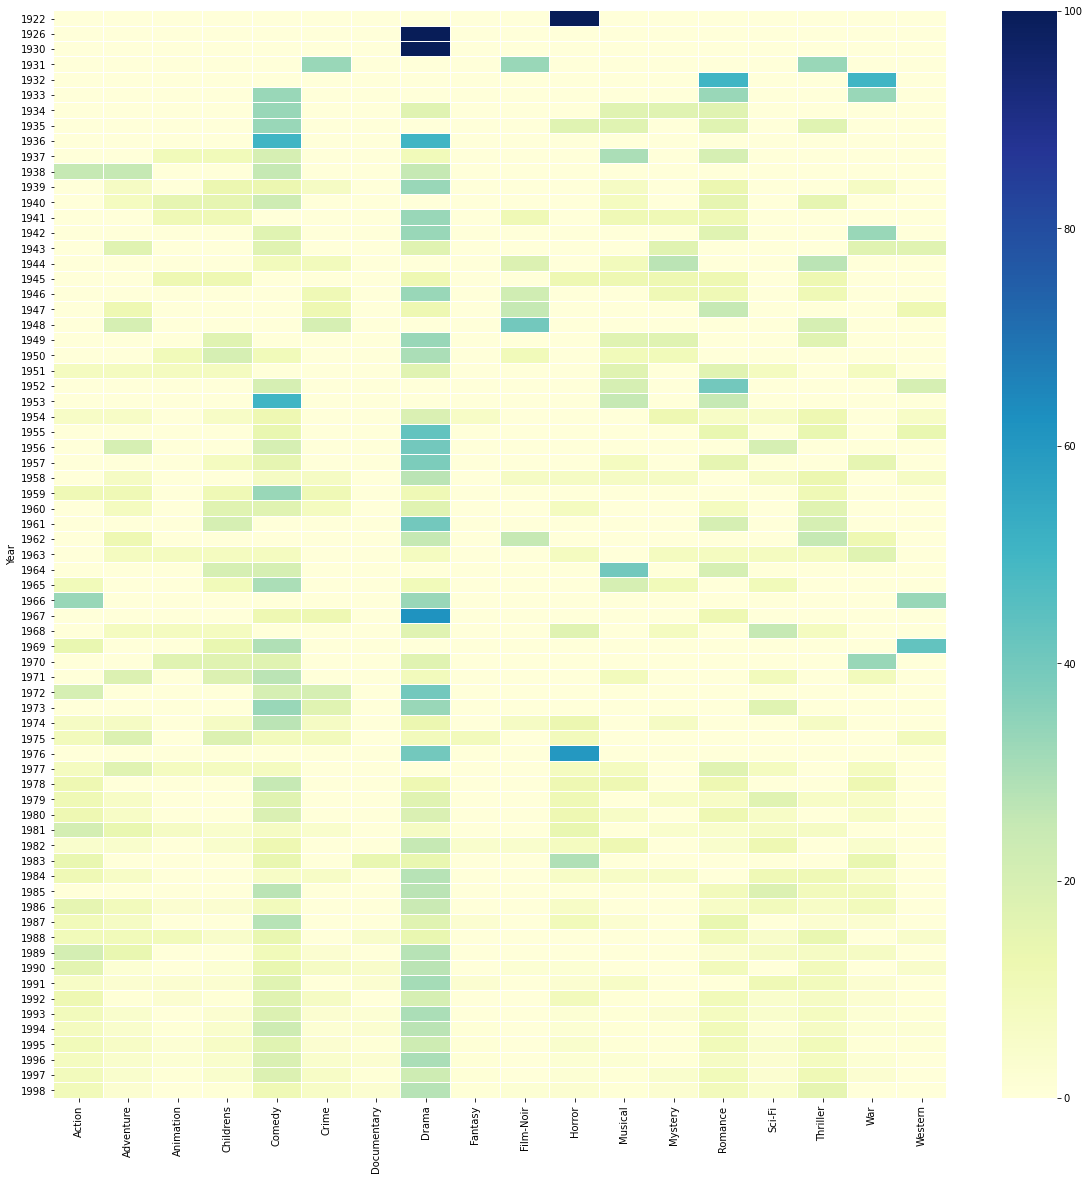

In [33]:
#Visualization
fig,ax = plt.subplots(figsize=(20, 20))   
sns.heatmap(GenrePercent, ax=ax, annot=False, linewidths=0.01, fmt= '.2f',cmap='YlGnBu') # the color intensity is based on 
plt.show()

**Insights:**
Drama is consistently the most popular genre; followed by Comedy and Thriller/Action. All other Genres with relative weak popularity.


# Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [34]:
# create working dataframe for ratings sorter on Movie ID
Ratings = rating.sort_values(by=['movie id'])
# Obtain average rating by movie id
MovieRating = Ratings.groupby('movie id').mean().reset_index().rename(columns = {'rating':'rating%'}).drop(['timestamp'], axis=1)    #.drop(['movie id','unknown'], axis=1).reset_index()  
# Obtain rating count by movie id
MovieRatingCount = Ratings.groupby('movie id').count().reset_index().rename(columns = {'rating':'ratingQ'})   #.drop(['movie id','unknown'], axis=1).reset_index()  
# Insert rating count (RatingQ) to working dataframe
MovieRating['RatingQ'] = MovieRatingCount['ratingQ']
#Generate new dataframe by merging prior one with Genre to obtain movie name
MRatings = MovieRating.merge(genre, on='movie id')
# Select important features
MRating = MRatings[["movie title","rating%","RatingQ"]]
#Filter by number of ratings greater than 100
MRating = MRating.loc[MRating['RatingQ'] >100]
#sort by average rating in descending order
MRating = MRating.sort_values(by=['rating%'], ascending=False) 

MRating.head(25)   # identifies the top 25 movies, ranked


,movie title,rating%,RatingQ
406,"Close Shave, A",4.491071,112
316,Schindler's List,4.466443,298
168,"Wrong Trousers, The",4.466102,118
481,Casablanca,4.456790,243
63,"Shawshank Redemption, The",4.445230,283
601,Rear Window,4.387560,209
11,"Usual Suspects, The",4.385768,267
49,Star Wars,4.358491,583
177,12 Angry Men,4.344000,125
133,Citizen Kane,4.292929,198


# Check for the validity of the below statements with respect to the data provided - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

**Please pay attention to what should be the denominator while calculating percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

## Dataframe preparation

In [35]:
# Prepare User dataframe
user = user.sort_values(by=['user id'])
# Prepare Rating dataframe to merge with User 
rating = rating.sort_values(by=['user id'])
#Merge dataframes and sorh on Movie ID to merge with Genre datafram
UserRatings = user.merge(rating, on='user id').sort_values(by=['movie id'])
# Prepare Genre dataframe and merge with prior
genre = genre.sort_values(by=['movie id'])
UserGenre = UserRatings.merge(genre, on='movie id')
#UserGenre

## Men watch more drama than women

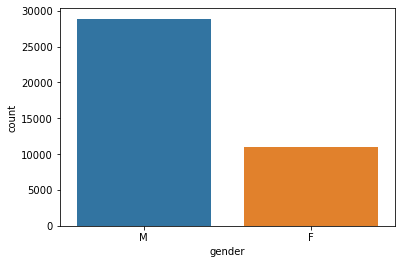

In [36]:
MFDrama = UserGenre[['gender','Drama']]
MFDrama = MFDrama.loc[MFDrama['Drama'] >0]
MFDrama
sns.countplot(MFDrama['gender'])

In [37]:
# First review
Males = MFDrama.loc[MFDrama['gender'] == 'M']
MalesCount = len(Males)
FemaleCount = len(MFDrama) - len(Males)

print('{} men and {} women have seen Drama movies, primary review confirms expectation.\n'.format(len(Males),len(MFDrama) - len(Males)))

# Secondary review

# Ho = Women watch more Drama than Men
n = len(MFDrama)
Pmf = 0.5
mu = n * Pmf
sigma = ((n*Pmf*(1-Pmf))**0.5)
print('Result: For Ho to maintain, the M to W distribution would have to be within 2 sigma ({})            from probable mean ({})\n'.format(2*sigma,mu))
print('There is a statistical difference to discard Ho, Men do watch more Drama than Women')



28887 men and 11008 women have seen Drama movies, primary review confirms expectation.

Result: For Ho to maintain, the M to W distribution would have to be within 2 sigma (199.73732750790475)            from probable mean (19947.5)

There is a statistical difference to discard Ho, Men do watch more Drama than Women


## Women watch more Sci-Fi than men

10101 men and 2629 women have seen SciFi movies, data contradicts expectation.

Result: For Ho to maintain, the M to W distribution would have to be within 2 sigma (112.82730166054668)            from probable mean (6365.0)

There is a statistical difference to discard Ho, Women do not watch more SciFi than men


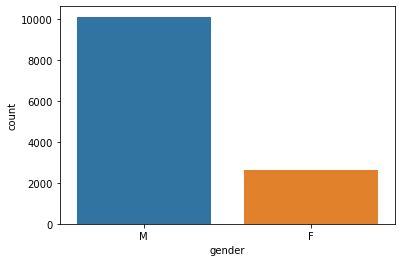

In [38]:

MFScFi = UserGenre[['gender','Sci-Fi']]
MFScFi = MFScFi.loc[MFScFi['Sci-Fi'] >0]
sns.countplot(MFScFi['gender'])
# First review

Males = MFScFi.loc[MFScFi['gender'] == 'M']
MalesCount = len(Males)
FemaleCount = len(MFScFi) - len(Males)
print('{} men and {} women have seen SciFi movies, data contradicts expectation.\n'.format(len(Males),len(MFScFi) - len(Males)))

# Ho = Women watch more SciFi than Men
n = len(MFScFi)
Pmf = 0.5
mu = n * Pmf
sigma = ((n*Pmf*(1-Pmf))**0.5)
print('Result: For Ho to maintain, the M to W distribution would have to be within 2 sigma ({})            from probable mean ({})\n'.format(2*sigma,mu))
print('There is a statistical difference to discard Ho, Women do not watch more SciFi than men')



## Men watch more Romance than Women

13603 men and 5858 women have seen Romance movies.

Result: For Ho to maintain, the M to W distribution would have to be greater than 2 sigma (139.5026881461429)            from probable mean (9730.5)

There is a statistical difference to keep Ho, Men do watch more Romance than Women


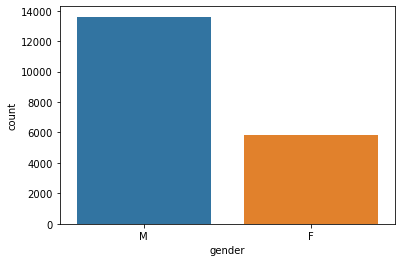

In [39]:
MFRom = UserGenre[['gender','Romance']]
MFRom = MFRom.loc[MFRom['Romance'] >0]

# First Review
Males = MFRom.loc[MFRom['gender'] == 'M']
MalesCount = len(Males)
FemaleCount = len(MFRom) - len(Males)
print('{} men and {} women have seen Romance movies.\n'.format(len(Males),len(MFRom) - len(Males)))

sns.countplot(MFRom['gender'])

# Secondary Review
# Ho = Men watch more Romantic movies than Women
n = len(MFRom)
Pmf = 0.5
mu = n * Pmf
sigma = ((n*Pmf*(1-Pmf))**0.5)
print('Result: For Ho to maintain, the M to W distribution would have to be greater than 2 sigma ({})            from probable mean ({})\n'.format(2*sigma,mu))
print('There is a statistical difference to keep Ho, Men do watch more Romance than Women')